In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [4]:
iris_df = pd.read_csv("iris.csv")

In [8]:
iris_df.sample(10) # sample selects random records

Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
20                    5.4                  3.4                   1.7   
35                    5.0                  3.2                   1.2   
85                    6.0                  3.4                   4.5   
146                   6.3                  2.5                   5.0   
72                    6.3                  2.5                   4.9   
40                    5.0                  3.5                   1.3   
84                    5.4                  3.0                   4.5   
82                    5.8                  2.7                   3.9   
136                   6.3                  3.4                   5.6   
99                    5.7                  2.8                   4.1   

     Petal width (in cm)            Class  
20                   0.2      Iris-setosa  
35                   0.2      Iris-setosa  
85                   1.6  Iris-versicolor  
146                  1.9   Iris-virginica  
72                   1.5  Iris-versicolor  
40                   0.3      Iris-setosa  
84                   1.5  Iris-versicolor  
82                   1.2  Iris-versicolor  
136                  2.4   Iris-virginica  
99                   1.3  Iris-versicolor

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [9]:
# let see  whether there are missing values, with info() funcation we observe there are none.
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
iris_df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [16]:
iris_df['Class'] = pd.Categorical(iris_df['Class']).codes
iris_df['Class'].sample(10) 

134    2
2      0
58     1
35     0
129    2
3      0
39     0
70     1
86     1
11     0
Name: Class, dtype: int8

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [17]:
iris_df.corr()['Class'][:] # we will not drop any as correlation is outside the guiadnace range in question

Sepal Length (in cm)    0.782561
Sepal Width in (cm)    -0.419446
Petal length (in cm)    0.949043
Petal width (in cm)     0.956464
Class                   1.000000
Name: Class, dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [18]:
iris_df.var() # variance is greater than 'almost zero' hence we will keep all variables.

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

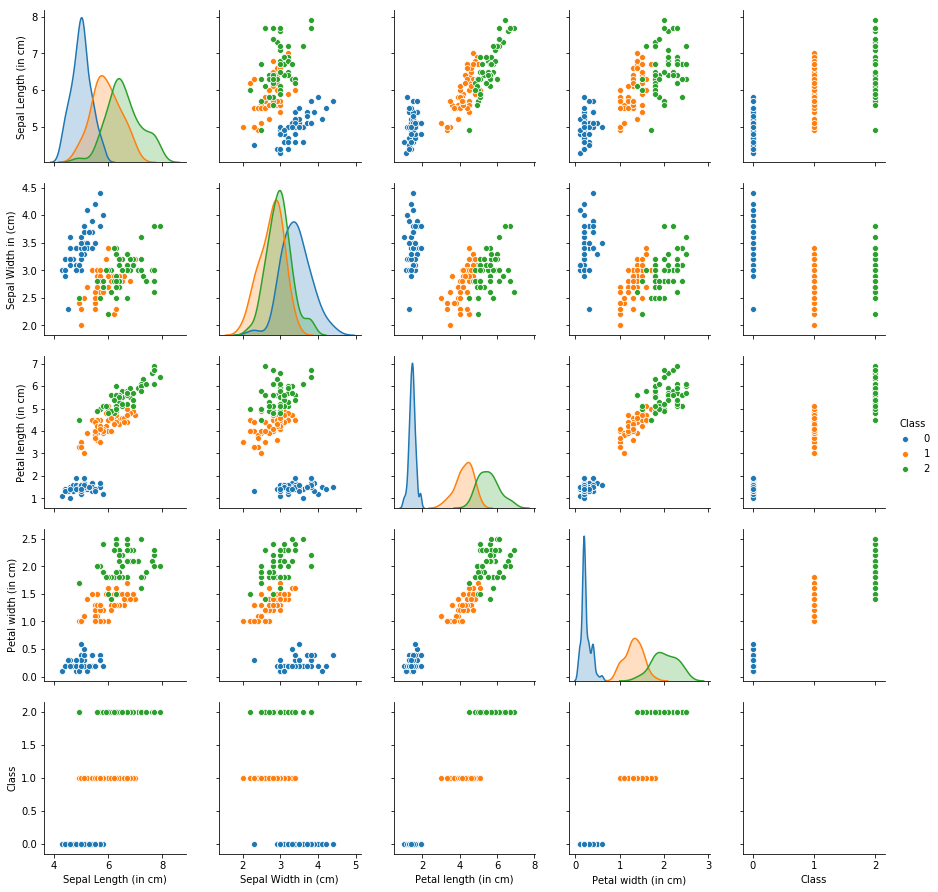

In [21]:
import seaborn as sns
sns.pairplot(iris_df, hue = "Class")

In [ ]:
# we see the that  each of the independent variables have a distinct range for each class. 
#scatter of petal width with petal length clear forms distict scatter concentrations for each class.
#The scatter  of sepal lenth v/s speal width has not reveal such clear and for class 1 and 2 the scatter is diffused.

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [33]:
#### from sklearn.model_selection import train_test_split

iris_ar = iris_df.values
X = iris_ar[:,0:4] # select all rows and first 4 columns which are the attributes
Y = iris_ar[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
# taking 80:20 training and test set
# Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [50]:
from sklearn.neighbors import KNeighborsClassifier
#import sklearn.metrics as sm
from sklearn.metrics import accuracy_score

## Creating the K Nearest Neighbour Classifier Object

NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', 
                           metric = 'euclidean')
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                           metric = 'euclidean')
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', 
                           metric = 'euclidean')

In [51]:
#print('KNN score when K= 3: %f' % NNH3.fit(X_train, y_train).score(X_test, y_test))
NNH3.fit(X_train, y_train)
NNH5.fit(X_train, y_train)
NNH9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [52]:
#sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
y_pred = NNH3.predict(X_test)
print( "KNN accuracy score when K = 3: %f" % accuracy_score(y_test, y_pred))

y_pred = NNH5.predict(X_test)
print( "KNN accuracy score when K = 5: %f" % accuracy_score(y_test, y_pred))

y_pred = NNH9.predict(X_test)
print( "KNN accuracy score when K = 9: %f" % accuracy_score(y_test, y_pred))

KNN accuracy score when K = 3: 1.000000
KNN accuracy score when K = 5: 1.000000
KNN accuracy score when K = 9: 0.966667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [63]:
mse = []
for x in range(1,20,2):
    NNH = KNeighborsClassifier(n_neighbors = x, weights = 'uniform', 
                           metric = 'euclidean')
    NNH.fit(X_train, y_train)
    y_pred = NNH.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mse.append(1 - acc)
    print( "acc when K = %i: %f" % (x, acc))
print(mse)

acc when K = 1: 1.000000
acc when K = 3: 1.000000
acc when K = 5: 1.000000
acc when K = 7: 0.966667
acc when K = 9: 0.966667
acc when K = 11: 0.966667
acc when K = 13: 0.966667
acc when K = 15: 0.966667
acc when K = 17: 0.966667
acc when K = 19: 0.966667
[0.0, 0.0, 0.0, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]


In [ ]:
# The ideal model is with K = 5 , as it mimines mse and maximizes the K at 5 for optimal accuracy

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

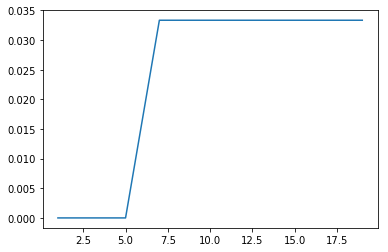

In [64]:
plt.plot(range(1,20,2), mse)

# Naive Bayes with Iris Data

In [65]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [67]:
x=iris_df.drop(['Class'], axis=1)
y=iris_df['Class']

In [69]:
#Check the dataset
print(y)
print(x)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int8
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

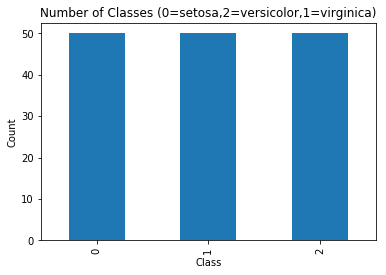

In [72]:
plt.figure()
pd.Series(iris_df['Class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Number of Classes (0=setosa,2=versicolor,1=virginica)');

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [ ]:
# done above

### Split data in Training and test set in 80:20.

In [ ]:
# done above

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [74]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [76]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [77]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [79]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


In [80]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.9

In [ ]:
#Show precision and Recall metrics

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB))





              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.77      0.87        13
         2.0       0.67      1.00      0.80         6

   micro avg       0.90      0.90      0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

